# Imports

In [94]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler

# EDA

### Univariate statistics

In [99]:
data = pd.read_csv('winequality-red.csv')

In [100]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [101]:
data.shape

(1599, 12)

In [102]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


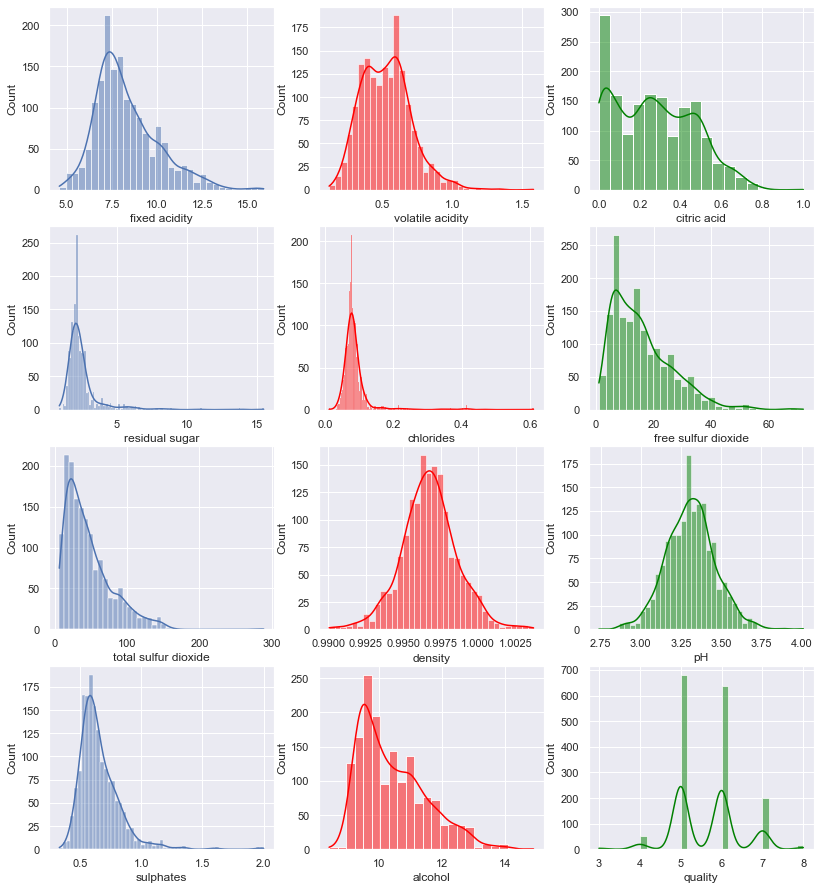

In [104]:
def plot_all_features(data: pd.DataFrame):
    sns.set(rc={'figure.figsize':(13.7,15.5)})
    fig, axs = plt.subplots(ncols=3, nrows=4)
    
    plot_col = plot_row = 0
    
    for col in data.columns:
        if plot_col % 3 == 1:
            sns.histplot(data[col], kde=True, ax=axs[plot_row][plot_col], color='red')
        elif plot_col % 3 == 2:
            sns.histplot(data[col], kde=True, ax=axs[plot_row][plot_col], color='green')
            plot_row += 1
        else:
            sns.histplot(data[col], kde=True, ax=axs[plot_row][plot_col])
            
        plot_col += 1
        
        if plot_col > 2:
            plot_col = 0 
        
    plt.show()
    
plot_all_features(data)

In [105]:
scaled_data = data.copy()
features = list(scaled_data.columns)[:-1]

for feature in features:
    scaler = MinMaxScaler()
    scaled_data[feature] = scaler.fit_transform(np.array(scaled_data[feature]).reshape(-1, 1))

<AxesSubplot:xlabel='value', ylabel='variable'>

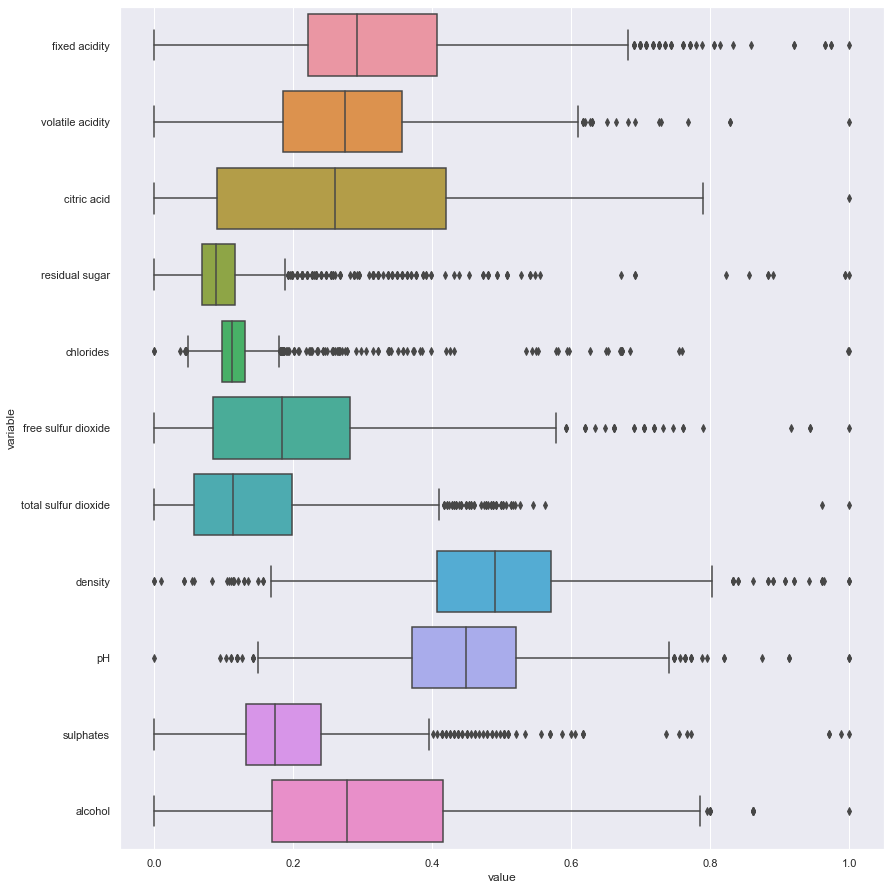

In [116]:
sns.boxplot(x='value', y='variable', 
            data=pd.melt(scaled_data.drop('quality', axis=1)), orient='h')

### Bivariate statistics

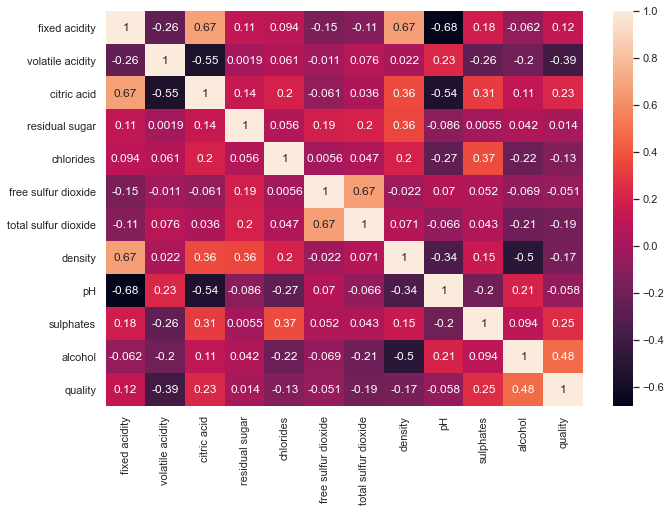

In [9]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.heatmap(data.corr(), annot=True)
plt.show()

# Hypothesis testing

In [128]:
def check_normality(data):
    _, p = stats.shapiro(data)
    
    if p < 0.05:
        print('Data is not normally distributed')
    else:
        print('Data is normally distributed')

In [141]:
def check_variance_equality(*groups):
    _, p = stats.levene(*groups)
    
    if p < 0.05:
        print('Groups have different variances')
    else:
        print('Groups have the same variances')

In [130]:
def categorize_wine(value):
    if value in (3, 4):
        return 'Bad'
    elif value in (5, 6):
        return 'Good'
    else:
        return 'Best'
    
data['quality_cat'] = data.quality.apply(categorize_wine)

In [131]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Good


In [134]:
bad_wine = data[data.quality_cat == 'Bad']
good_wine = data[data.quality_cat == 'Good']
best_wine = data[data.quality_cat == 'Best']

## Hyptothesis 1
### H0: Good wine mean pH = bad wine mean pH = best wine mean pH
### H1: At least one of them is different

In [143]:
#Assumptions
check_normality(bad_wine.pH)
check_normality(good_wine.pH)
check_normality(best_wine.pH)
check_variance_equality(bad_wine.pH, good_wine.pH, best_wine.pH)

Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Groups have the same variances


In [146]:
_, p = stats.kruskal(bad_wine.pH, good_wine.pH, alternative='two-sided', method='auto')
print(p)

0.00023862438178931514


*p-value is less than 0.05, therefore, reject H0*

## Hypothesis 2
### H0: Good wine has less free sulfates than a bad one (μ₁≤μ₂)
### H1: μ₁>μ₂

In [169]:
#Assumptions
check_normality(bad_wine['sulphates'])
check_normality(good_wine['sulphates'])
check_variance_equality(good_wine['sulphates'], bad_wine['sulphates'])

Data is not normally distributed
Data is not normally distributed
Groups have the same variances


In [208]:
_, p = stats.mannwhitneyu(bad_wine['sulphates'], good_wine['sulphates'], 
                          alternative='less')
print(p)

2.592936299780195e-06


*p-value is less than 0.05, therefore, reject H0*

## Hyptothesis 3
### H0: Best wine has more alcohol rather than a bad one (μ₁>μ₂)
### H1: μ₁≤μ₂

In [160]:
#Assumptions
check_normality(good_wine.alcohol)
check_normality(best_wine.alcohol)
check_variance_equality(best_wine.alcohol, bad_wine.alcohol)

Data is not normally distributed
Data is normally distributed
Groups have the same variances


In [209]:
_, p = stats.mannwhitneyu(bad_wine.alcohol, best_wine.alcohol, alternative='greater')
print(p)

0.9999999999999992


*p-value is greater than 0.05, therefore, cannot reject H0*

## Hypothesis 4
### H0: Best wine is denser rather than a good one (μ₁>μ₂)
### H1: μ₁≤μ₂

In [186]:
check_normality(best_wine.density)
check_normality(good_wine.density)
check_variance_equality(best_wine.density, bad_wine.density)

Data is normally distributed
Data is not normally distributed
Groups have different variances


In [210]:
_, p = stats.mannwhitneyu(good_wine.density, best_wine.density, alternative='greater')
print(p)

5.950337928951667e-10


*p-value is less than 0.05, therefore, reject H0*